In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
#load files
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#check shape
df.shape

(1460, 81)

In [5]:
#checking the columns with thei dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.drop(['Id'],axis=1,inplace = True)

In [7]:
#stastical description 
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling missing data

In [8]:
total_null_values = df.isna().sum().sort_values(ascending=False)
total_null_values = total_null_values[total_null_values>0]
null_values_inpercent = total_null_values/len(df)*100
null_df = pd.DataFrame({'Total':total_null_values,'Ratio(%)':null_values_inpercent})
null_df


,Total,Ratio(%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


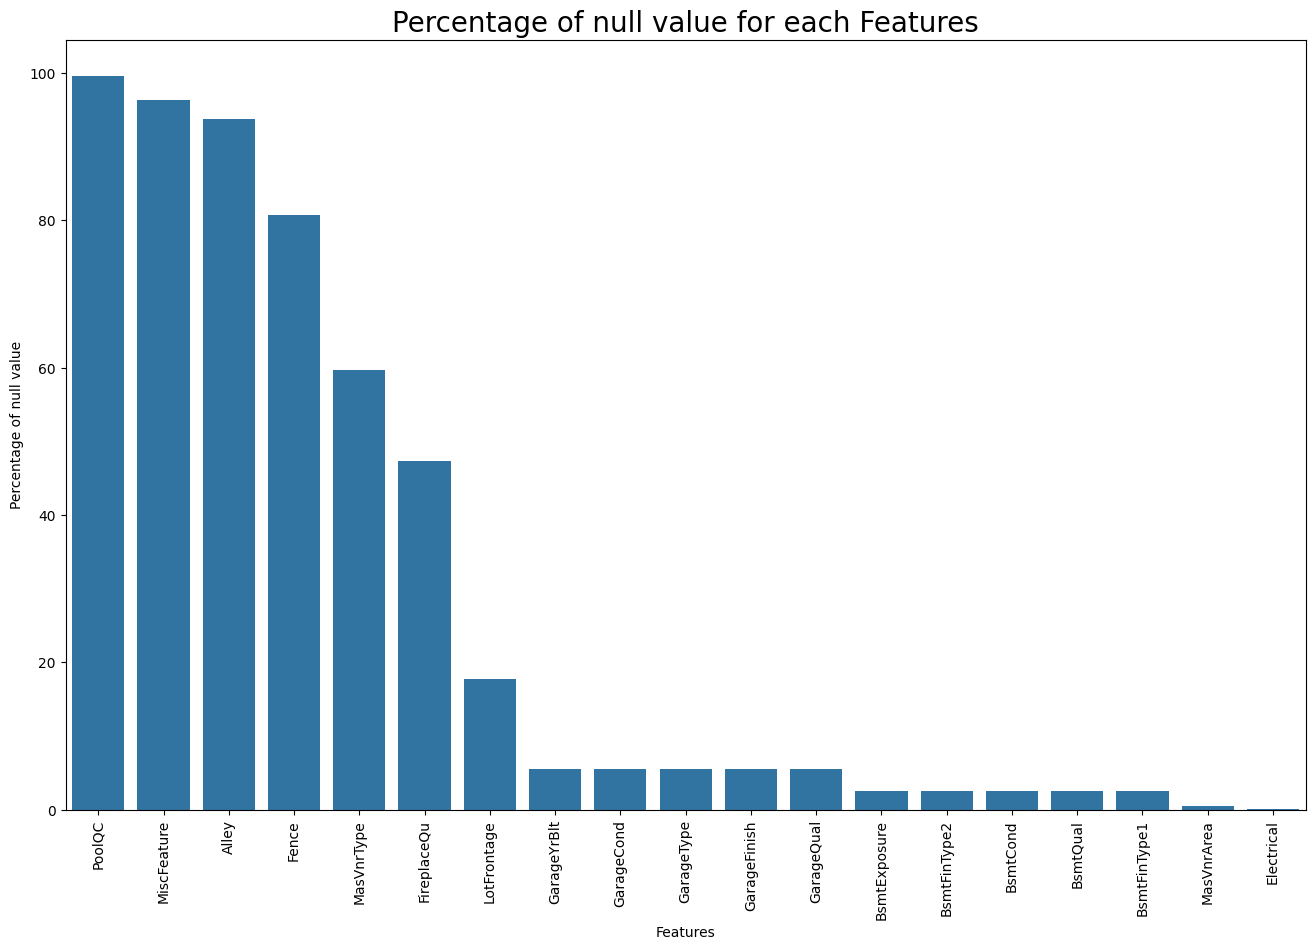

In [9]:
#visualizing the null_values 
plt.figure(figsize=(16,10))
sns.barplot(y=null_values_inpercent,x=total_null_values.index,)
plt.xlabel('Features',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('Percentage of null value',fontsize=10)
plt.title('Percentage of null value for each Features',fontsize=20)
plt.show()

In [10]:
#let's remove the columns whose null values are greater than 30% c
null_df_30 = null_df[null_df['Ratio(%)'] >= 30]
removing_col=null_df_30.index.tolist()
df.drop(df[removing_col],axis=1,inplace=True)

In [11]:
removing_col

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

In [12]:
#LotFrontage
# when you check the distribution of data in LotFrontage, it is right skewed so median would be better (you can see in above)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [13]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [14]:
#We can Replae GarageYrBlt by 0 becuase when we check GarageArea for null values of GarageYrBlt is 0 
# this make sense there is No Garage in that property. So we can fill nan value by 0
df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)

In [15]:
#### For GarageType, GarageQual, GarageFinish, GargeCond: These features can be replaced by 'NA' which means no garage.
for col in ('GarageType','GarageQual','GarageFinish','GarageCond'):
    df[col] = df[col].fillna('NA')

In [16]:
#BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond : We can fill these features by 'NA' which means No 
for col in ('BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('NA')

In [17]:
#Electrical: In electrical field there is only one missing value and it is categorical features
# we can fill this one using mode
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])


In [18]:
#check if there any missing value remaining?
total_null_values = df.isna().sum().sort_values(ascending=False)
total_null_values[total_null_values>0]

Series([], dtype: int64)

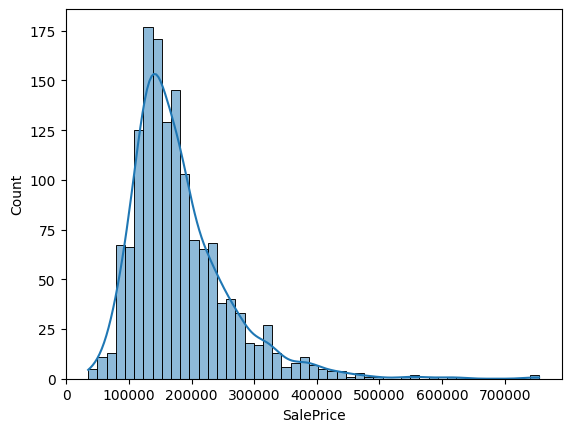

In [19]:
#some analysis on SalePrice
sns.histplot(df['SalePrice'],kde=True)
plt.show()

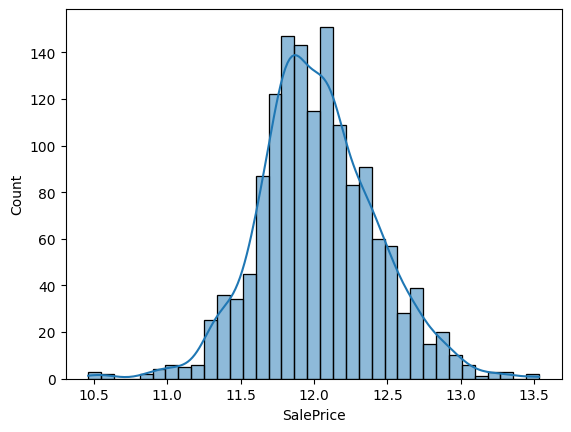

In [20]:
#since sale prices is rightskewed ,lets apply log transformation inorder to normalize it
from scipy.special import log1p
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'],kde=True)
plt.show()


In [21]:
target_data = df['SalePrice']
df.drop(['SalePrice'],axis=1,inplace=True)

In [27]:
#converting non_numeric predictors stored as number into string
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold']=df['YrSold'].apply(str)
df['MoSold']=df['YrSold'].apply(str)


In [33]:

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [29]:
#label encoding for ordinal categorical Features
from sklearn.preprocessing import LabelEncoder
cols = [
    'BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'HeatingQC','KitchenQual','GarageQual', 'GarageCond', 'PavedDrive',
      'SaleCondition','Street',  'LotShape','LandSlope','ExterQual', 'ExterCond','YrSold','MoSold'
]
for col in cols:
    lbl = LabelEncoder()
    #fit on both train and test data
    df[col] = lbl.fit_transform(df[col])
    
 


In [30]:
#selecting only numerical data
num_feat = df.select_dtypes(include = ['int64','float64']).columns
skewed_feat = df[num_feat].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewed_df = pd.DataFrame({'Skew':skewed_feat})
skewed_df

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


In [31]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Filter skewed features
skewed_df = skewed_df[abs(skewed_df) > 0.75]
skewed_features = skewed_df.index

print("There are {} skewed numerical features to Box-Cox transform".format(skewed_df.shape[0]))
lam = 0.1
# Apply Box-Cox1p transformation
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)


There are 52 skewed numerical features to Box-Cox transform


In [34]:
#Getting dummy categorical features
df = pd.get_dummies(df)
df.shape

(1460, 230)

In [35]:
##Model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test = train_test_split(df,target_data,test_size=0.3,
                                                 random_state=42)
gbd = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,
                                max_depth=4,max_features='sqrt',min_samples_leaf = 15,
                                min_samples_split = 10,
                                loss='huber',random_state=42)

gbd.fit(X_train,y_train)
y_pred = gbd.predict(X_test)


In [39]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.12392507345116599


In [42]:
feature_importance = gbd.feature_importances_
feature_names = X_train.columns
feat_importance_df= pd.DataFrame({
    'Feature':feature_names,
    'Importance':feature_importance
}).sort_values(by='Importance',ascending=False)

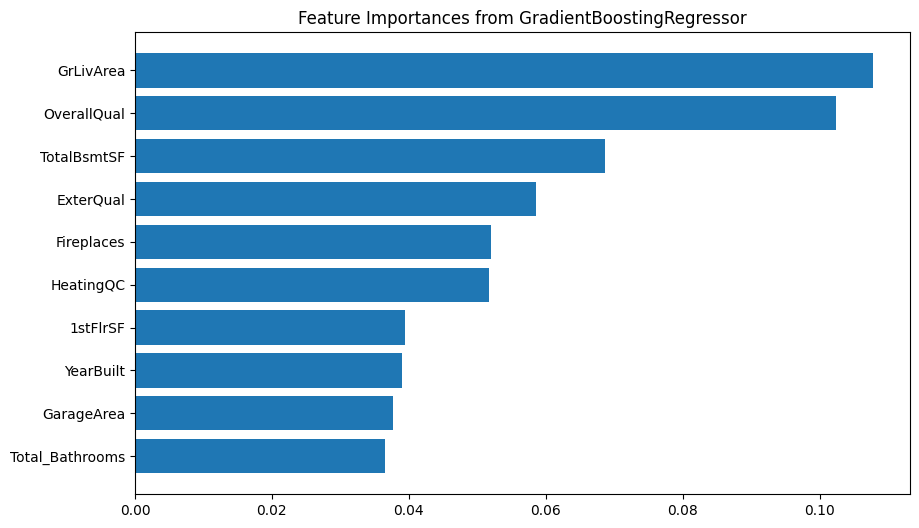

In [45]:
plt.figure(figsize=(10,6))
top_importance = feat_importance_df.head(10)
plt.barh(top_importance['Feature'], top_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances from GradientBoostingRegressor")
plt.show()